In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
import sklearn as sk
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import OneHotEncoder
import os
from keras.utils import np_utils

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence

from keras.regularizers import l2

from keras.preprocessing.text import Tokenizer
from keras.models import load_model
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
dataname = "rawdata_100.pkl"
modelname = 'LR.h5'

num_class = 2
max_features = 40000

size_batch = 10
num_epoch = 10
l2_lambda = 0.00001

randomShuffle = ShuffleSplit(n_splits=1, test_size=.2, random_state=0)
onehot_encoder = OneHotEncoder(sparse=False)
t = Tokenizer(num_words=max_features)

### Method

In [3]:
def getData(filename):
    print("---------------")
    print("| Getting data...")
    print("---------------")
    
    data = pd.read_pickle(filename)
    reviewTextList = data.reviewText.values
    t.fit_on_texts(reviewTextList)
    text = t.texts_to_matrix(reviewTextList, mode='count')
    
    data_X = text
    data_Y = data['overall']
    data_Y = np_utils.to_categorical(data_Y, num_class)
    
    return data_X, data_Y

In [4]:
def splitData(x, y):
    X_trains, X_test, Y_trains, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    X_train, X_validation, Y_train, Y_validation = train_test_split(X_trains, Y_trains, test_size=0.2, random_state=42)
    return X_train, X_validation, X_test, Y_train, Y_validation, Y_test

In [5]:
def train(x_train, x_validation, y_train, y_validation, batch_size, epochs):
    print("---------------")
    print("| Training...")
    print("---------------")
    
    model = Sequential()
    model.add(Dense(2, input_dim=max_features, activation='softmax', kernel_regularizer=l2(l2_lambda)))
    print(model.summary())
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
    history=model.fit(x_train,y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(x_validation, y_validation),
                      )    
    plt.figure('categorical_accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Categorical Accuracy')
    plt.plot(history.history['categorical_accuracy'])
    plt.show()
    model.save(modelname)
    return model
    del model

In [6]:
def test(x_test, y_test):
    print("---------------")
    print("| Testing...")
    print("---------------")
    model = load_model(modelname)
    
    score = model.evaluate(x_test,y_test)
    print('Test loss:',score[0])
    print('Test accuracy:',score[1])
    
    y_test=np.argmax(y_test,axis=1)
    y_pred=model.predict_classes(x_test)
    
    print(classification_report(y_test,y_pred))

### Main class

In [7]:
def main():
    X, Y = getData(dataname)
    
#     X_train, X_validation, X_test, Y_train, Y_validation, Y_test = splitData(X, Y)
#     train(X_train, X_validation, Y_train, Y_validation, size_batch, num_epoch)
#     test(X_test, Y_test)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    train(X_train, X_test, Y_train, Y_test, size_batch, num_epoch)
    test(X_test, Y_test)

---------------
| Getting data...
---------------
---------------
| Training...
---------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 80002     
Total params: 80,002
Trainable params: 80,002
Non-trainable params: 0
_________________________________________________________________
None
Train on 82270 samples, validate on 20568 samples
Epoch 1/10
82270/82270 [==============================] - 70s 849us/step - loss: 0.3418 - categorical_accuracy: 0.8747 - val_loss: 0.3010 - val_categorical_accuracy: 0.8947
Epoch 2/10
82270/82270 [==============================] - 67s 809us/step - loss: 0.2661 - categorical_accuracy: 0.9031 - val_loss: 0.3056 - val_categorical_accuracy: 0.8926
Epoch 3/10
82270/82270 [==============================] - 66s 807us/step - loss: 0.2510 - categorical_accuracy: 0.9099 - val_loss: 0.3125 - val_categorical_accuracy: 0.8

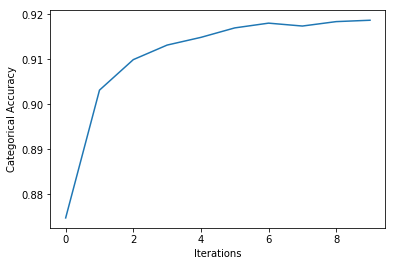

---------------
| Testing...
---------------
20568/20568 [==============================] - 8s 373us/step
Test loss: 0.35442393451337917
Test accuracy: 0.8845779852197588
             precision    recall  f1-score   support

          0       0.91      0.86      0.88     10330
          1       0.86      0.91      0.89     10238

avg / total       0.89      0.88      0.88     20568



In [8]:
main()

In [9]:
### ussing adversial model

In [10]:
filename_adv = "data_adversial_wordnet.pkl"

In [12]:
X_test_adv, Y_test_adv = getData(filename_adv)

---------------
| Getting data...
---------------


In [13]:
test(X_test_adv, Y_test_adv)

---------------
| Testing...
---------------
102664/102664 [==============================] - 50s 490us/step
Test loss: 1.564674233615533
Test accuracy: 0.5114840645211564
             precision    recall  f1-score   support

          0       0.51      0.50      0.50     51319
          1       0.51      0.53      0.52     51345

avg / total       0.51      0.51      0.51    102664



In [ ]:
// less feature => high test accuracy